1. Опишите теоретическую модель градиентного спуска

2. Напишите следующий год: сгенерируйте данные в виде набора точек; постройте регрессионную модель;
оцените её точность; визуализируйте результат.

3. Опишите метрику для проверки качества алгоритмов классификации.

4. Опишите технологию масштабирования признаков. Привидите примеры.

### 1 Номер

Вот так выглядет гардиент какого-либо вектора
$\nabla J(\theta) = \left[ \frac{\partial J(\theta)}{\partial \theta_1}, \frac{\partial J(\theta)}{\partial \theta_2}, \dots, \frac{\partial J(\theta)}{\partial \theta_n} \right]$

Он показывает направление, в котором ветор растет. Соответственно можно сделать финт ушами: за ветор взять ошибку, а вместо того чтобы ее увеличивать, ее уменьшать, тогда:

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$ - наша ошибка
и благодаря математике мы знаем, что 
$\nabla J(\theta) = \frac{2}{m} X^T (X \theta - y)$ (так проще считать)

Теперь мы можем обновить наши веса:
$\theta = \theta - \eta \cdot \nabla J(\theta)$


### 2 Номер 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class StupidModel:
    def __init__(self):
        self.dimension = 0
        self.weights = []
        self.bias = 0
        self.learning_rate = 0.01
        self.epochs = 1000

    def train(self, X, y):
        self.dimension = X.shape[1] # Для визуализации 
        self.weights = np.zeros(self.dimension) # сколько измеренийц столько и весов, удивительно
        self.bias = 0 # его можно любым брать
        
        m = len(X)

        for epoch in range(self.epochs):
            # Предсказание на основе текущих весов и смещения
            y_pred = np.dot(X, self.weights) + self.bias

            # Вычисление ошибок
            errors = y_pred - y

            # Вычисление градиентов
            gradient_w = (1 / m) * np.dot(X.T, errors)  # Градиент по весам
            # Тут стоит сказать, что гардиент по весам вычисляется по формуле 1/l * X^T * e
            # такой неочевидный вид уравнения происходит из матричного анализа? 
            gradient_b = (1 / m) * np.sum(errors)       # Градиент по смещению
            # а гардиент по смещению - парень простой потому что взаимодействует только со смещением
            # т.е. числом, и все у него хорошо

            # Обновление весов и смещения
            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def print_evaluation_metrics(self, y_true, y_pred):
        mse = np.mean((y_pred - y_true) ** 2)
        # MSE = 1 / n * sum((y-Y)^2)
        # Нужен чтобы оценить средний квадрат ошибки. Это позволяет грубо оценить "хорошесть" модели 

        rmse = np.sqrt(mse)
        # RMSE = sqrt(MSE)
        # Нужен чтобы оценка средней ошибки изменялась не в квадратах единиц, а в еденицах
        # по сути просто чуть более приближено к реальности        

        mae = np.mean(np.abs(y_pred - y_true))
        # MAE = 1 / n * sum(y-Y)
        # Нужно чтобы было как MSE, но меньше колебалось из-за выбросов, которые сильно могут 
        # подпортить малину MSE'шке 
        
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r_squared = 1 - (ss_residual / ss_total)
        # R^2 = 1 - MSE/sum((Y-mean(Y))^2)
        # Показывает, насколько нейронка вообще понимает что делает, при R = 1 нейронка осознаная,
        # нормально предсказывает
        # при R = 0 нейронка тупо всегда говорит среднее число
        # при R < 1 значит что нейронка хуже чем среднее число  
        
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R-squared: {r_squared:.4f}")

    def analyze_result(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y_pred - y) ** 2)
        # print(f"Mean Squared Error: {mse}")
        print(f"Weights: {self.weights}")
        print(f"Bias: {self.bias}")
        if self.dimension == 1:
            plt.scatter(X[:, 0], y, color='blue', label='Actual')
            plt.scatter(X[:, 0], y_pred, color='red', label='Predicted')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.legend()
            plt.show()
        elif self.dimension == 2:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual')
            ax.scatter(X[:, 0], X[:, 1], y_pred, color='red', label='Predicted')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('y')
            ax.legend()
            plt.show()

Mean Squared Error (MSE): 0.2087
Root Mean Squared Error (RMSE): 0.4568
Mean Absolute Error (MAE): 0.3644
R-squared: 0.9970
Weights: [3.04736206]
Bias: 1.7029999724219802


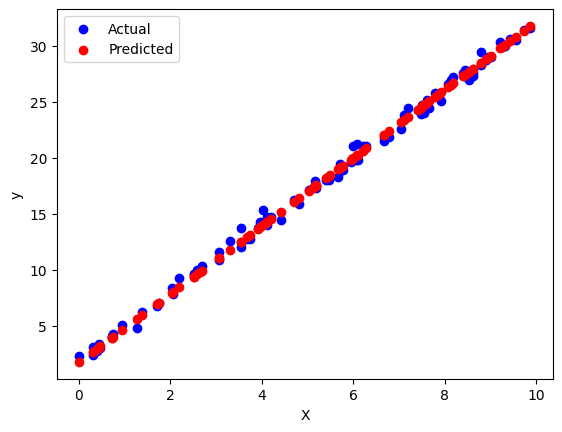

In [3]:
num_samples = 100
X = np.random.rand(num_samples, 1) * 10
y = 3 * X[:, 0] + 2 + np.random.randn(num_samples) * 0.5 

model = StupidModel()
model.train(X, y)
model.print_evaluation_metrics(y, model.predict(X))
model.analyze_result(X, y)


### 3 Номер
``` python
print(f'Accuracy: {accuracy:.4f}')
# все верные предсказания / все предсказания
# сама по себе не очень полезна, особенно если датасет "странный", но позволяет быстро определить
# насколько все плохо  
print('Confusion Matrix:')
print(cm)
print("True Negative || False Positive")
print("False Negative || True Positive")
# Самая информативная метрика, от того и сложно читаемая
#  |                  | Predicted Positive | Predicted Negative |
#  |------------------|--------------------|--------------------|
#  | Actual Positive  | True Positive (TP) | False Negative (FN)|
#  | Actual Negative  | False Positive (FP)| True Negative (TN) |
# Показывает насколько хорошо модель справилась с классификацией. Вообще матрица может быть любого
# "квадратного" размера, но в таком случае ее исследовать становится тяжелее и тяжелее, поэтому 
# рассмотрим 2х2. ТР это когда значение = 1 и нейронка сказала что значение = 1. ТN соответственно 
# наоборот. FN и FP это когда нейронка ошибается в ту или иную сторону. По этой матрице можно 
# понять что вообще нейронка научилась делать. К примеру если вы изначально хотели научить ее 
# различать 10 классов, но так вышло что она может с хорошей точностью определять лишь 1, то 
# это будет заметно только в этой матрице, но не в accuracy 

# Сегодня мне привели замечательную аналогию для более простого понимания этой матрицы, если 
# столбцами называть "реальные" значения в классах, а строки предсказаные то все рпезко встает 
# на свои места. 


print(f"Precision: {report['precision']:.4f}")
# это отношения количества реальных 1 к сумме всех предсказанных едениц TP/(TP+FP). Собственно по
# этой метрике можно как раз увидеть что 1 из 10 классов предсказывается очень "хорошо". Например
# модель может выбрать один из классов "мусорным" и в него скидывать все в чем не уверена на 100%,
# тогда для одного из немусорных классов пресижн будет большим. 

print(f"Recall: {report['recall']:.4f}")
# а тут отношение количества реальных едениц к сумме из предсказанных едениц и "недопредсказанных"
# едениц. Это нужно когда нам очень важно чтобы минимальное количество едениц осталось нулями.
# Эту метрику можно легко обмануть непропорциональным кол-вом данных для одного из классов. 
# Например пытаясь делать классификацию в датасете в котором 95% строк пренадлежат одному и тому же
# классу модель скорее начнет всегда говорить что строка пренадлежит именно этому классу 

print(f"F1-Score: {report['f1-score']:.4f}")
# а f1 как раз является средним гармоническим между присижном и реколлом, он нужен чтобы модель не 
# могла по хитрому нас обдурить, например всегда выбирая один из классов она максимизирует реколл
# или перетренировавшись на один из классов чтобы максимизировать присижн 
```

### 4 Номер

Как и во всем другом существует несколько основынх, и очень много специфичных.
Из основных:
- Нормализация $\frac{X-min(X)}{max(X) - min(X)}$
- Стандартизация - разбитие на отклонения по Гауссу $\frac{X - M_x}{D_x}$
- Логарифмерирование $\log_{10}{1+X}$

Все эти техники нужны чтобы лучше подготовить данные чтобы на их основе обучилось более "хорошая"
модель. 
Например для линейной регрессии на гардиентном спуске нормализация (и стандартизация если данные
позволяют) помогают тем, что делают гардиентный спуск более "стабильным". Если бы у одной переменной
масштаб был порядка 10^1, ф у другой 10^12, то явно скачки весов во второй переменной были бы больше
а на первой соответственно могли бы быит недостаточно большими (если lr подогнан под второй признак)

Но для деревьев например нормализация не нужна